# 3802ICT Assignment 1

<p style="text-align:right">Junghee Yang (Kat) <br>
Regnier Avice<br>
Yunpeng Huang (Steven)</p>

## Project title:

## A brief description of the problem/question
<p>Amsterdam is the capital city of Netherland with a population of 870,000 with 17 million tourists every year. Many tourists these days are staying at Airbnb hosted by homeowners. This dataset is from insiderairbnb.com which contains descriptions of Airbnb listings on 6th of December 2018 in Amsterdam. The dataset includes the name of the listing, number of reviews, locations, etc. </p>

<p>This projects are consist of these problems/questions:</p>
 

<ul>
    <li><b>Classification and label prediction -</b> Can prices be predicted by the size of property and reviews?</li>
    <li><b>Association and Correlation - </b></li>
    <li><b>Clustering </b> - Do patterns in listening attributes correspond with the geographical location of the listenings?</li>
</ul>



## Dataset description
<p>The dataset contains Airbnb listings in Amsterdam on 6th December 2018 and it was retrieved from Kaggle which was downloaded from insideairbnb.com. It contains details of Airbnb listings such as prices, reviews, size of the place, etc. with 96 attributes with 20,030 data samples. </p>

## Algorithms/techniques for different learning tasks

### Classification and label prediction
<b>Linear Regression</b>: Regression is a supervised machine learning method that provides predictions from data by learning the relationship between entities. It is widely used in biological, behavioral and social sciences to describe possible relationships between variables. 

### Association and Correlation
<b>Alg:</b> Description

### Clustering
<b>K-Means (Lloyd’s Algorithm):</b> K-Means clustering is based on the idea to generate k clusters and assign each point to the cluster with the nearest mean-point. The optimal approach is NP-Hard with exponential time complexity. The Lloyd’s Algorithm is a heuristic approach to approximate the optimal result which in practice should run in linear time complexity <font color="red">reference</font>.

## Measurements to evaluate the results

### Regression
#### Mean squared error

Mean squared error is the average squared differene between the estiation and the reuslts. It is always positive value and the closer to zero, more accurate the estimation. MSE is computed as

$
{\large
\begin{align}
MSE = \frac{1}{n}\sum (Y_i - \hat{Y}_i)^2
\end{align}
}%
$

, where $
{
\begin{align}
Y
\end{align}
}%
$ is the tector of observed values of the variable being predicted, with $
{
\begin{align}
\hat{Y}
\end{align}
}%
$ being the predicted value. 

### Association and Correlation
Some metrics

### Clustering

To evaluate the effectiveness of clusters the Intracluster and Intercluster distance is measured. Effective clustering minimizes the Intracluster distance while maximizing the Intercluster distance.

For this project two popular methods are used. The Dunn Index and the Silhouette analysis.

#### Dunn Index

The goal is to maximize the value of the Dunn Index. A high Dunn Index indicates large inter cluster distance and low intra cluster distance. 

$
{\large
\begin{align}
DunnIndex = \frac{min(d(InterCluster))}{max (d(IntraCluster))} 
\end{align}
}%
$


where the inter cluster distance is the maximum distance between two points of two clusters

$
{\large
\begin{align}
d(InterCluster) = max(C_{a_i}, C_{b_j})
\end{align}
}%
$


and the intra cluster distance is maximum distance between two points of the same cluster

$
{\large
\begin{align}
d(InterCluster) = max(C_{a_i}, C_{a_j})
\end{align}
}%
$

#### Silhouette analysis

For each point the silhouette value will be caluclated which can have the range of [-1,1]. The goal is to maximize the silhouette value. Many negative values are an indication for to many or to few clusters. This value will be used to determine the right size of $k$.

$
{\large
\begin{align}
\Delta s(i) = \frac{b(i)-a(i)}{max (a(i),b(i)}
\end{align}
}%
$

where $a(i)$ is the mean distance of the point $i$ to other points of the same cluster

$
{\large
\begin{align}
\Delta a(i) = \frac{\Sigma  d(i,j)}{|C_i| -1}
\end{align}
}%
$

and $b(i)$ is the minimum (In case of more than two clusters the smallest mean is taken) mean distance of the point $i$ to other points of the other cluster. 
$
{\large
\begin{align}
\Delta b(i) = min(\frac{\Sigma  d(i,j)}{|C_k|}) \hspace{1cm}for \hspace{0.5cm} k \neq i
\end{align}
}%
$

## Libaries

In [1]:
# Import libraries and dataset 
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
from scipy import stats

## Dataset

In [2]:
# Read dataset
git_url = "https://raw.githubusercontent.com/jungheeyang/3802ICT-Assignment-1/master/listings_details.csv"
col_list = ['host_response_rate', 'host_is_superhost', 'host_identity_verified', 'zipcode', 
            'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 
            'price', 'weekly_price', 'monthly_price', 'security_deposit', 'number_of_reviews',
            'review_scores_rating', 'latitude', 'longitude', 'is_location_exact']

df = pd.read_csv(git_url, sep=',', usecols=col_list)

## Initial Data pre-processing

The initial preprocessing is conducted to convert the attribute data types into a consistent format before the data exploration is started

In [3]:
def dollar_to_int(df):
    df = df.replace('[\$,]', '', regex=True).astype(float)
    return df


def obj_to_bool(df):
    df = df.replace('f', 'FALSE', regex=True).astype(bool)
    df = df.replace('t', 'TRUE', regex=True).astype(bool)
    return df


def percent_to_float(df):
    df = df.replace('%', '', regex=True).astype(float)
    return df


df.host_response_rate = percent_to_float(df.host_response_rate)

df.price = dollar_to_int(df.price)
df.security_deposit = dollar_to_int(df.price)
df.monthly_price = dollar_to_int(df.price)
df.security_deposit = dollar_to_int(df.price)

df.host_is_superhost = obj_to_bool(df.host_is_superhost)
df.host_identity_verified = obj_to_bool(df.host_identity_verified)

df.head()

,host_response_rate,host_is_superhost,host_identity_verified,zipcode,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,security_deposit,number_of_reviews,review_scores_rating
0,100.0,True,True,NaN,52.365755,4.941419,f,Apartment,Private room,2,1.5,1.0,2.0,59.0,NaN,59.0,59.0,248,97.0
1,100.0,True,True,1013 XE,52.390225,4.873924,t,Apartment,Entire home/apt,5,1.0,2.0,2.0,160.0,$543.00,160.0,160.0,42,96.0
2,100.0,True,True,1017,52.365087,4.893541,t,Townhouse,Entire home/apt,2,1.0,1.0,1.0,80.0,NaN,80.0,80.0,233,87.0
3,100.0,True,True,1016,52.373114,4.883668,f,Apartment,Entire home/apt,3,1.0,1.0,1.0,125.0,$650.00,125.0,125.0,1,100.0
4,100.0,True,True,1013,52.386727,4.892078,t,Houseboat,Private room,2,1.0,1.0,1.0,150.0,$810.00,150.0,150.0,171,99.0


## Data exploration

<ul>
    <li style="font-size:16px">Number of the data samples</li>
    <ul>
        <li style="list-style-type: square">Total number of samples: 20,030</li>
    </ul>
</ul>


In [4]:
df.count

<bound method DataFrame.count of        host_response_rate  host_is_superhost  host_identity_verified  zipcode  \
0                   100.0               True                    True      NaN   
1                   100.0               True                    True  1013 XE   
2                   100.0               True                    True     1017   
3                   100.0               True                    True     1016   
4                   100.0               True                    True     1013   
...                   ...                ...                     ...      ...   
20025                 NaN               True                    True  1098 VV   
20026                 NaN               True                    True     1094   
20027                 NaN               True                    True  1093 GB   
20028                 NaN               True                    True     1094   
20029                 NaN               True                    True  1078 C

<br>
<br>
<ul>
    <ul>
        <li style="list-style-type: square">Total number of NULL</li>
    </ul>
</ul>


In [5]:
df.isnull().sum(axis = 0)

host_response_rate         9483
host_is_superhost             0
host_identity_verified        0
zipcode                     866
latitude                      0
longitude                     0
is_location_exact             0
property_type                 0
room_type                     0
accommodates                  0
bathrooms                    10
bedrooms                      8
beds                          7
price                         0
weekly_price              17187
monthly_price                 0
security_deposit              0
number_of_reviews             0
review_scores_rating       2639
dtype: int64

<br>
<br>
<ul>
    <li style="font-size:16px">Types of attributes</li>
</ul>

In [6]:
df.dtypes

host_response_rate        float64
host_is_superhost            bool
host_identity_verified       bool
zipcode                    object
latitude                  float64
longitude                 float64
is_location_exact          object
property_type              object
room_type                  object
accommodates                int64
bathrooms                 float64
bedrooms                  float64
beds                      float64
price                     float64
weekly_price               object
monthly_price             float64
security_deposit          float64
number_of_reviews           int64
review_scores_rating      float64
dtype: object

<br>
<br>
<ul>
    <li style="font-size:16px">statistical information of each attribute - Five number summery</li>
</ul>

In [7]:
df.describe()

,host_response_rate,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,monthly_price,security_deposit,number_of_reviews,review_scores_rating
count,10547.000000,20030.000000,20030.000000,20030.000000,20020.000000,20022.00000,20023.000000,20030.000000,20030.000000,20030.000000,20030.000000,17391.000000
mean,93.755950,52.365212,4.888977,2.891912,1.137662,1.44506,1.849223,152.181178,152.181178,152.181178,21.560459,94.849520
std,17.034864,0.015996,0.035573,1.318760,0.793903,0.88568,1.389664,145.828976,145.828976,145.828976,43.240292,6.648685
min,0.000000,52.288378,4.753247,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,100.000000,52.355126,4.863595,2.000000,1.000000,1.00000,1.000000,96.000000,96.000000,96.000000,3.000000,93.000000
50%,100.000000,52.364590,4.886387,2.000000,1.000000,1.00000,1.000000,125.000000,125.000000,125.000000,8.000000,97.000000
75%,100.000000,52.375074,4.908288,4.000000,1.000000,2.00000,2.000000,175.000000,175.000000,175.000000,22.000000,100.000000
max,100.000000,52.424713,5.027689,17.000000,100.500000,12.00000,32.000000,8500.000000,8500.000000,8500.000000,695.000000,100.000000


## Data pre-processing

In [8]:
# New data frame for cleaned data
dfc = df.copy()

### Drop unuseful column

In [9]:
dfc.drop(['host_response_rate'], axis=1, inplace=True)

### Remove unuseful records

In [10]:
# Remove if beds, bedrooms, bathrooms, zipcode, review_scores_rating are missing
dfc.dropna(subset=['beds', 'bedrooms', 'bathrooms', 'zipcode', 'review_scores_rating'], inplace=True)

### Calculate missing weekly and monthly prices

In [11]:
#Standard weekly price is 7*price
dfc['weekly_price'].fillna(dfc['price']*7, inplace=True)

#Standard monthly price is 30*price
dfc['monthly_price'].fillna(dfc['price']*30, inplace=True)

### Replace empty security deposit with 0

In [12]:
dfc['security_deposit'].fillna(0, inplace=True)

### Remove outliers in price

In [13]:
dfc['z_score'] = np.abs(stats.zscore(dfc['price']))
dfc = dfc[dfc.z_score < 3]

###  Check data after pre processing

In [14]:
dfc.head()

,host_is_superhost,host_identity_verified,zipcode,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,security_deposit,number_of_reviews,review_scores_rating,z_score
1,True,True,1013 XE,52.390225,4.873924,t,Apartment,Entire home/apt,5,1.0,2.0,2.0,160.0,$543.00,160.0,160.0,42,96.0,0.097687
2,True,True,1017,52.365087,4.893541,t,Townhouse,Entire home/apt,2,1.0,1.0,1.0,80.0,560,80.0,80.0,233,87.0,0.554900
3,True,True,1016,52.373114,4.883668,f,Apartment,Entire home/apt,3,1.0,1.0,1.0,125.0,$650.00,125.0,125.0,1,100.0,0.187820
4,True,True,1013,52.386727,4.892078,t,Houseboat,Private room,2,1.0,1.0,1.0,150.0,$810.00,150.0,150.0,171,99.0,0.016113
5,True,True,1056,52.375342,4.857289,t,Apartment,Private room,2,1.0,1.0,2.0,65.0,455,65.0,65.0,434,93.0,0.677260


In [15]:
# No NULL values 
dfc.isnull().sum(axis = 0)

host_is_superhost         0
host_identity_verified    0
zipcode                   0
latitude                  0
longitude                 0
is_location_exact         0
property_type             0
room_type                 0
accommodates              0
bathrooms                 0
bedrooms                  0
beds                      0
price                     0
weekly_price              0
monthly_price             0
security_deposit          0
number_of_reviews         0
review_scores_rating      0
z_score                   0
dtype: int64

In [16]:
df.count

<bound method DataFrame.count of        host_response_rate  host_is_superhost  host_identity_verified  zipcode  \
0                   100.0               True                    True      NaN   
1                   100.0               True                    True  1013 XE   
2                   100.0               True                    True     1017   
3                   100.0               True                    True     1016   
4                   100.0               True                    True     1013   
...                   ...                ...                     ...      ...   
20025                 NaN               True                    True  1098 VV   
20026                 NaN               True                    True     1094   
20027                 NaN               True                    True  1093 GB   
20028                 NaN               True                    True     1094   
20029                 NaN               True                    True  1078 C

## Visualization

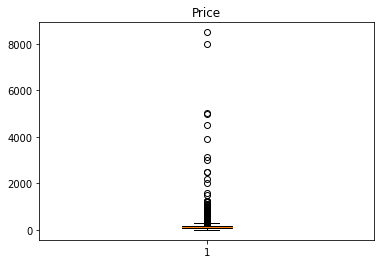

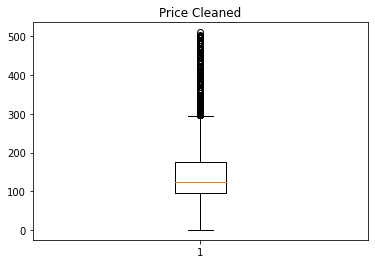

In [17]:
plt.boxplot(df['price'])
plt.title("Price")
plt.show()

plt.boxplot(dfc['price'])
plt.title("Price Cleaned")
plt.show()

In [18]:
dfc.to_csv('listings_details_cleaned.csv',index=False)